In [575]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data.

In [576]:
df= pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [577]:
#importing Data
df  = pd.read_csv('Rose.csv', index_col = 0, parse_dates = True)
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [578]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [579]:
df.shape

(187, 1)

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [581]:
df.isna().sum()

Rose    2
dtype: int64

In [582]:
df.Rose.fillna((df['Rose'].median()),inplace = True)

In [583]:
df.isnull().sum()

Rose    0
dtype: int64

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [585]:
df.describe()

,Rose
count,187.000000
mean,90.347594
std,38.966791
min,28.000000
25%,63.000000
50%,86.000000
75%,111.000000
max,267.000000


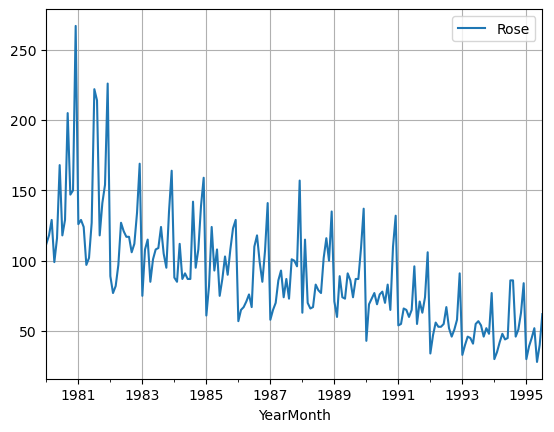

In [586]:
df.plot()
plt.grid()

In [587]:
df['1995']

,Rose
YearMonth,
1995-01-01,30.0
1995-02-01,39.0
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

# Exploratory Data Analysis

Plot a year on year boxplot for the Rose wine Sales

# Yearly Boxplot

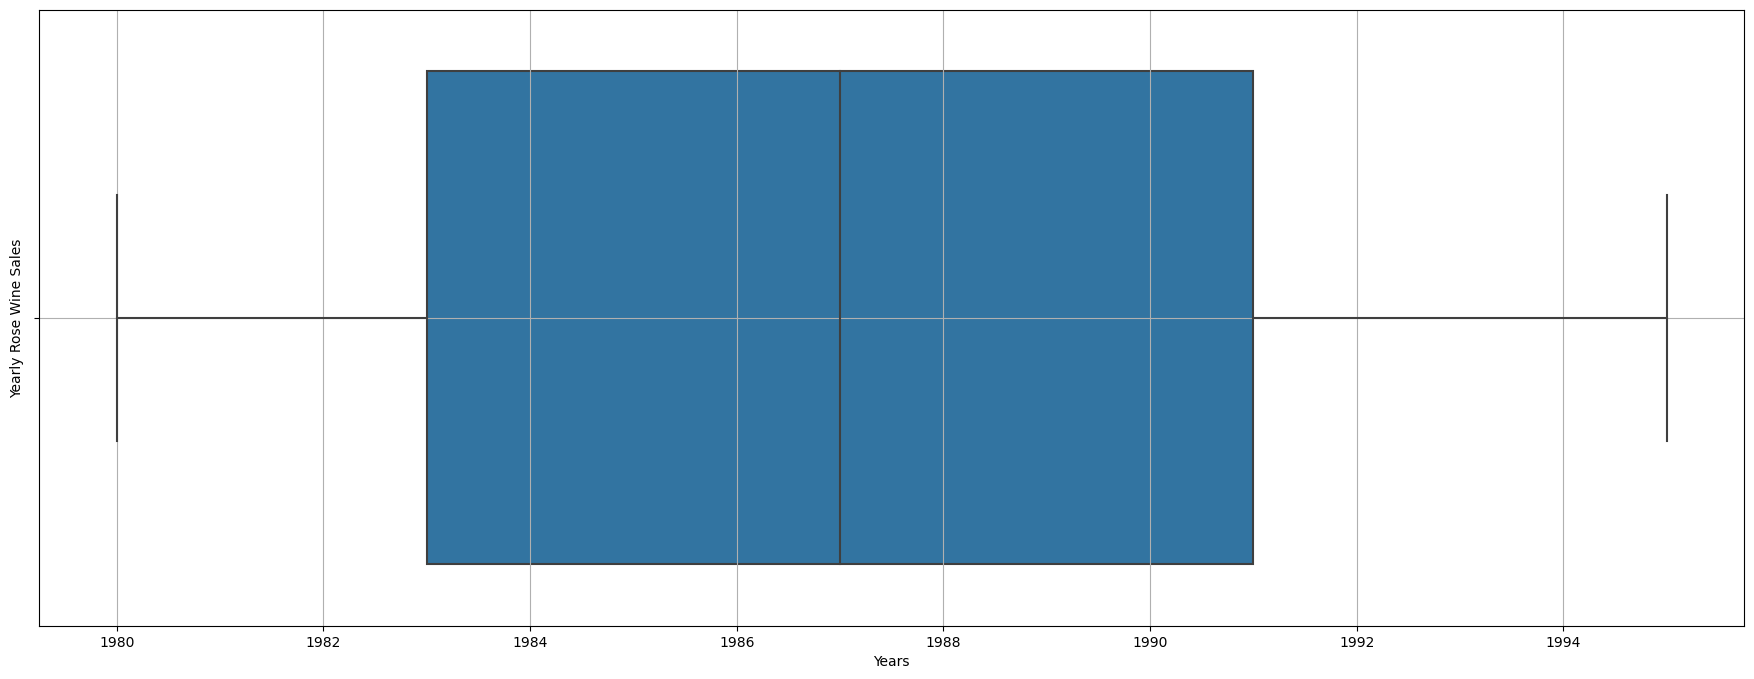

In [588]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.year, data=df, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Rose Wine Sales');

Plot a monthly boxplot for Rose Wine Sales taking all the years into account

# Monthly Plot

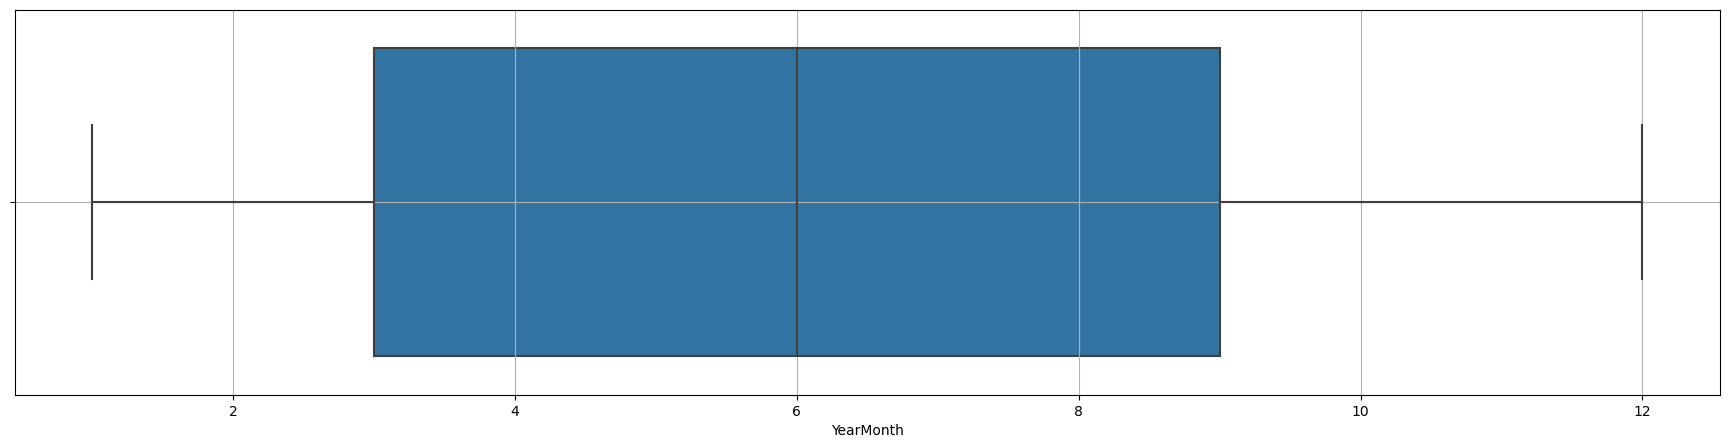

In [589]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(x=df.index.month, data=df, ax=ax,whis=1.5)
plt.grid();

Plot a monthplot of the give Time Series

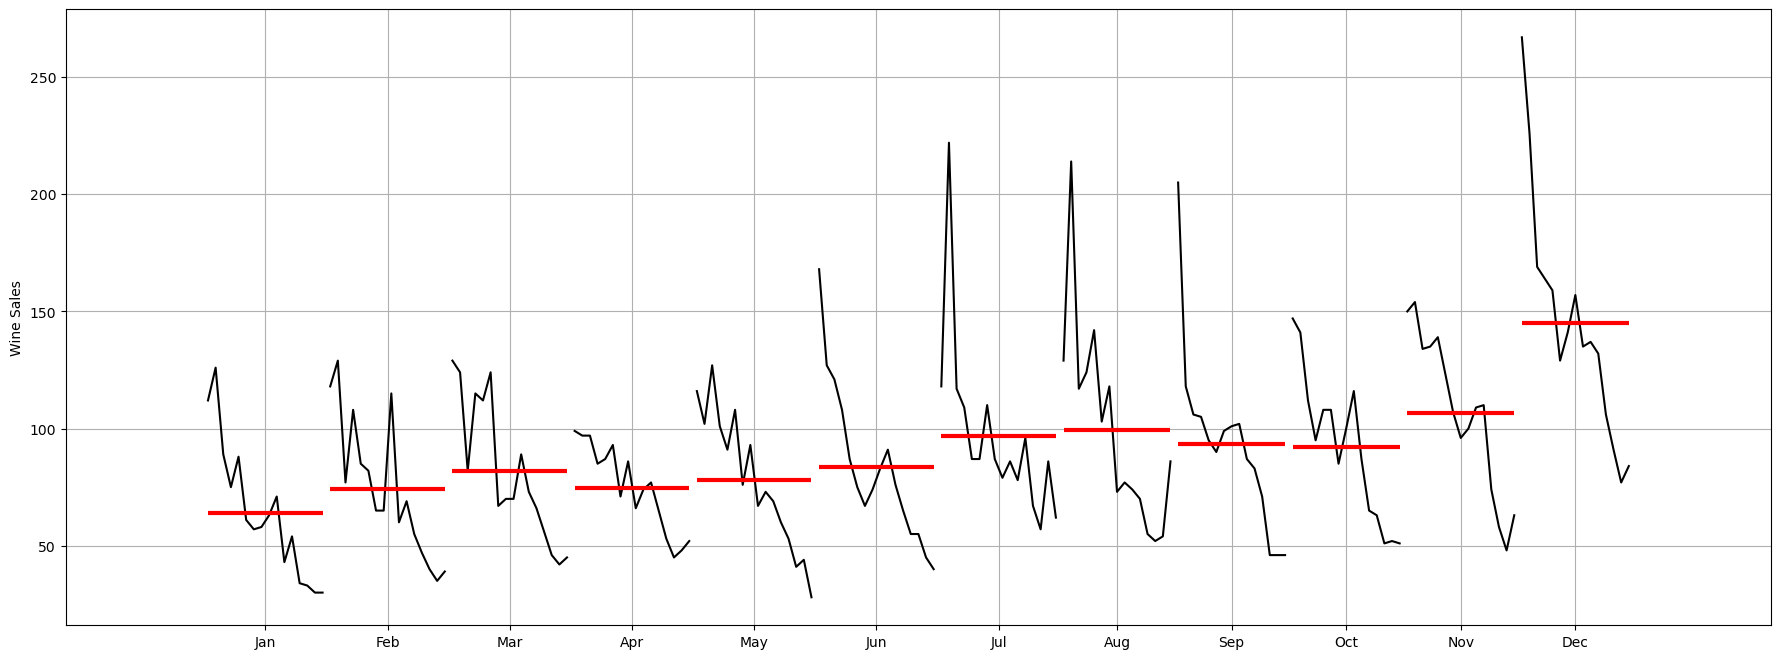

In [590]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();

# Plot a graph of monthly sales across years.

In [591]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [592]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [593]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)

In [594]:
def highlight_max(s):
    is_max = s == s.max()
    return ['backgroud-color: yellow' if v else '' for v in is_max]

In [595]:
highlighted_data = monthly_sales_across_years.style.apply(highlight_max,axis =0)

In [596]:
highlighted_data = highlighted_data.format('{:.0f}')

In [597]:
highlighted_data

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112,118,129,99,116,168,118,129,205,147,150,267
1981,126,129,124,97,102,127,222,214,118,141,154,226
1982,89,77,82,97,127,121,117,117,106,112,134,169
1983,75,108,115,85,101,108,109,124,105,95,135,164
1984,88,85,112,87,91,87,87,142,95,108,139,159
1985,61,82,124,93,108,75,87,103,90,108,123,129
1986,57,65,67,71,76,67,110,118,99,85,107,141
1987,58,65,70,86,93,74,87,73,101,100,96,157
1988,63,115,70,66,67,83,79,77,102,116,100,135


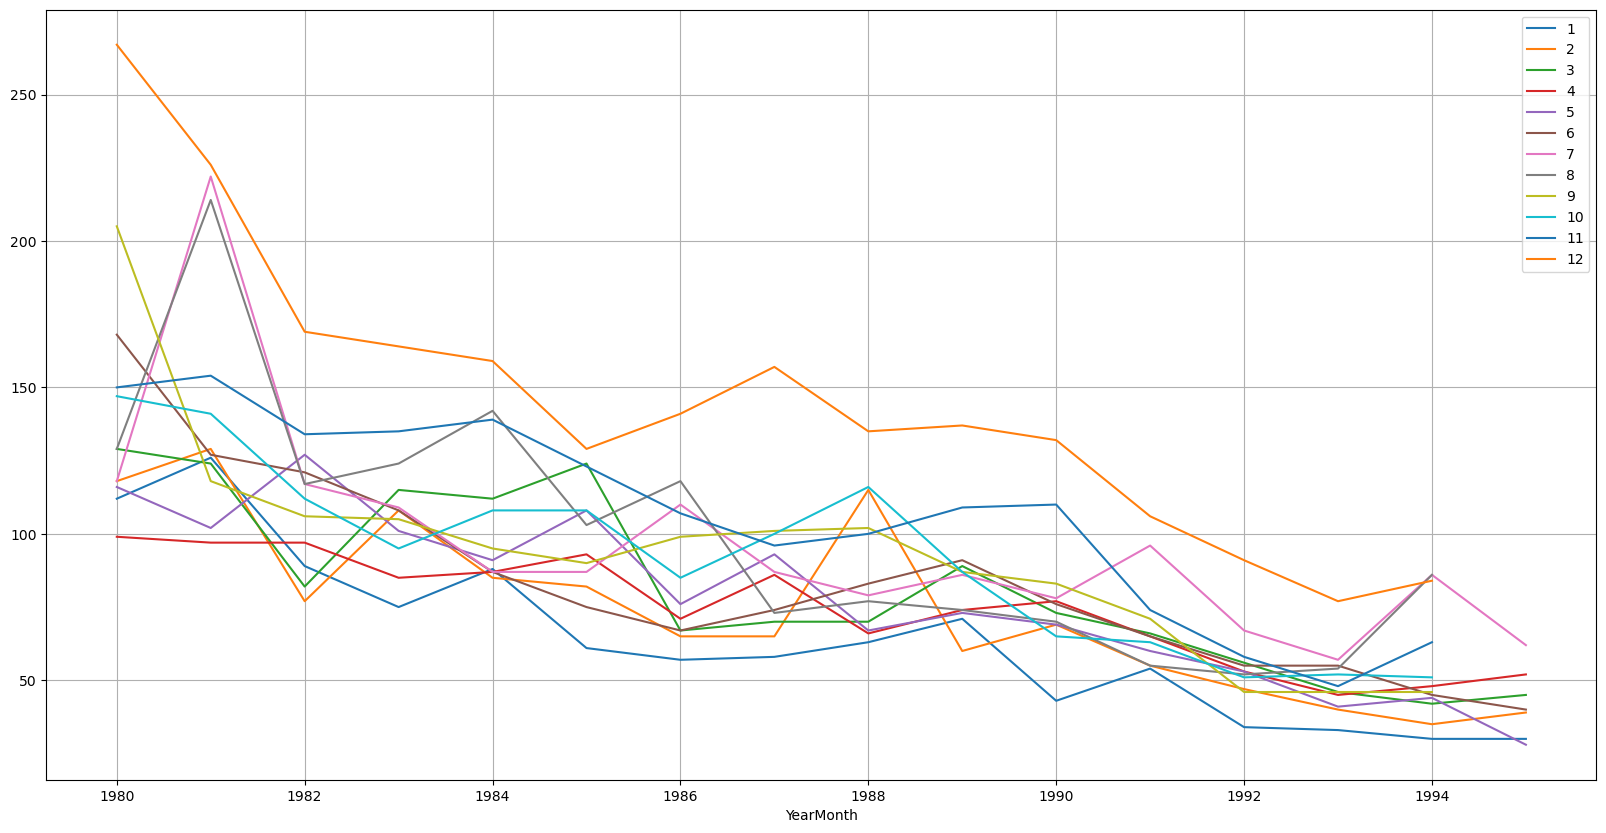

In [598]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

# Plot the Empirical Cumulative Distribution.

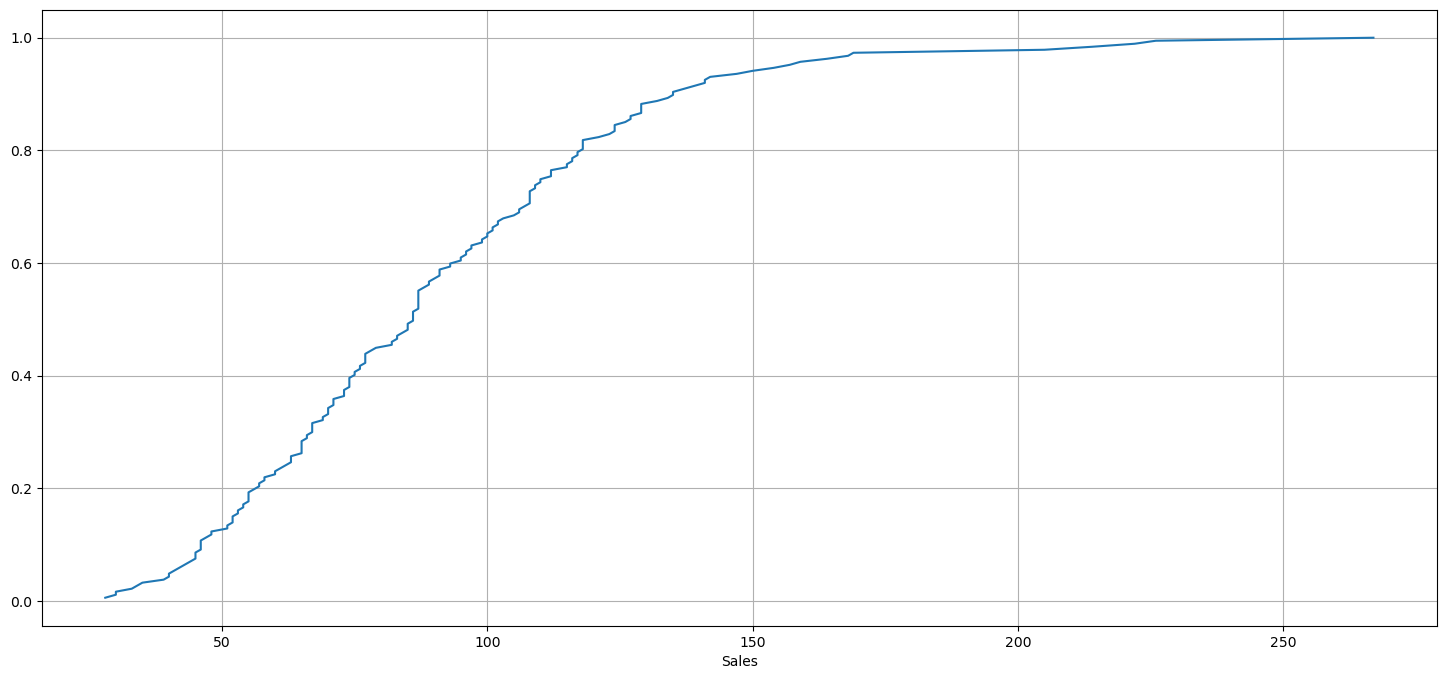

In [599]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

# Plot the average Sales per month and the month on month percentage change of Sales.

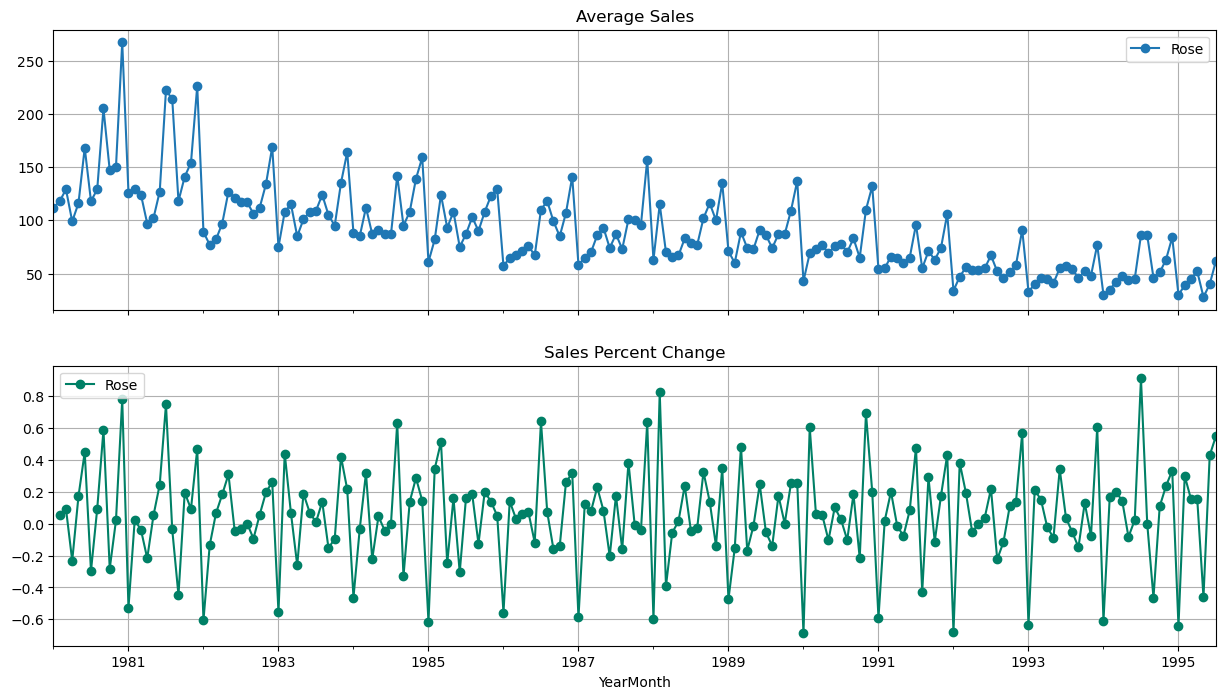

In [600]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

# Decompose the Time Series

# Additive Model

In [601]:
from statsmodels.tsa.seasonal import seasonal_decompose

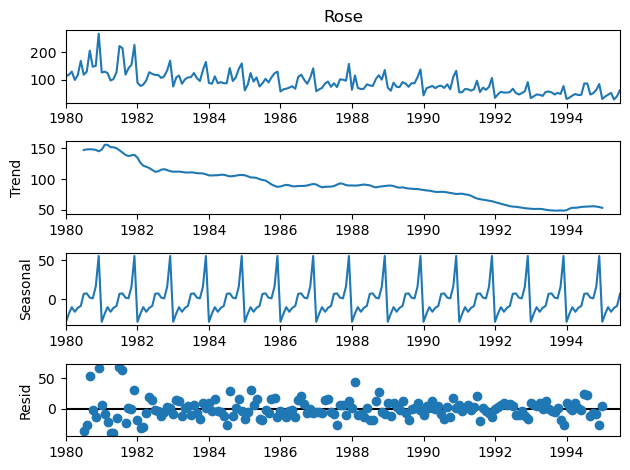

In [602]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [603]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.355258
1980-02-01   -17.794345
1980-03-01    -9.764583
1980-04-01   -15.577083
1980-05-01   -10.675298
1980-06-01    -8.157440
1980-07-01     7.161409
1980-08-01     7.741964
1980-09-01     2.328075
1980-10-01     1.425298
1980-11-01    16.400298
1980-12-01    55.266964
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -36.244742
1980-08-01   -26.866964
1980-09-01    54.296925
1980-10-01    -2.508631
1980-11-01   -13.816964
1980-12-01    66.60803

# Multiplicative Model

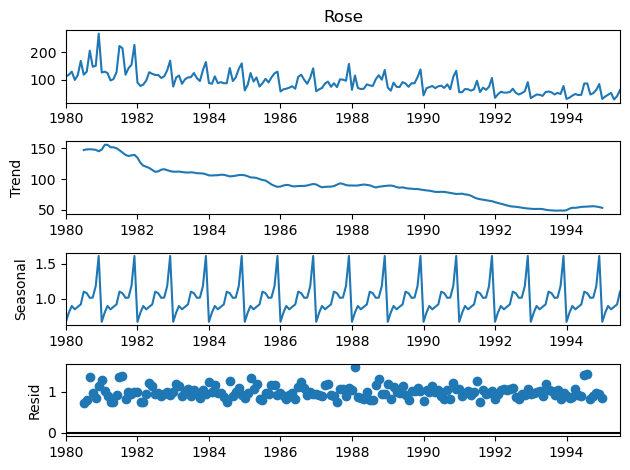

In [604]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [605]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.664904
1980-02-01    0.801176
1980-03-01    0.893234
1980-04-01    0.844896
1980-05-01    0.881276
1980-06-01    0.915970
1980-07-01    1.099977
1980-08-01    1.077255
1980-09-01    1.010266
1980-10-01    1.014454
1980-11-01    1.182097
1980-12-01    1.614497
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.729348
1980-08-01    0.808431
1980-09-01    1.367594
1980-10-01    0.978541
1980-11-01    0.860779
1980-12-01    1.139546
Name: resid, dtype: fl

# 3. Split the data into training and test. The test data should start in 1991.

In [606]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [607]:
train.shape

(132, 1)

In [608]:
test.shape

(55, 1)

In [609]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [610]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# Model 1: Linear Regression

In [611]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [612]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [613]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [614]:
from sklearn.linear_model import LinearRegression

In [615]:
lr = LinearRegression()

In [616]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

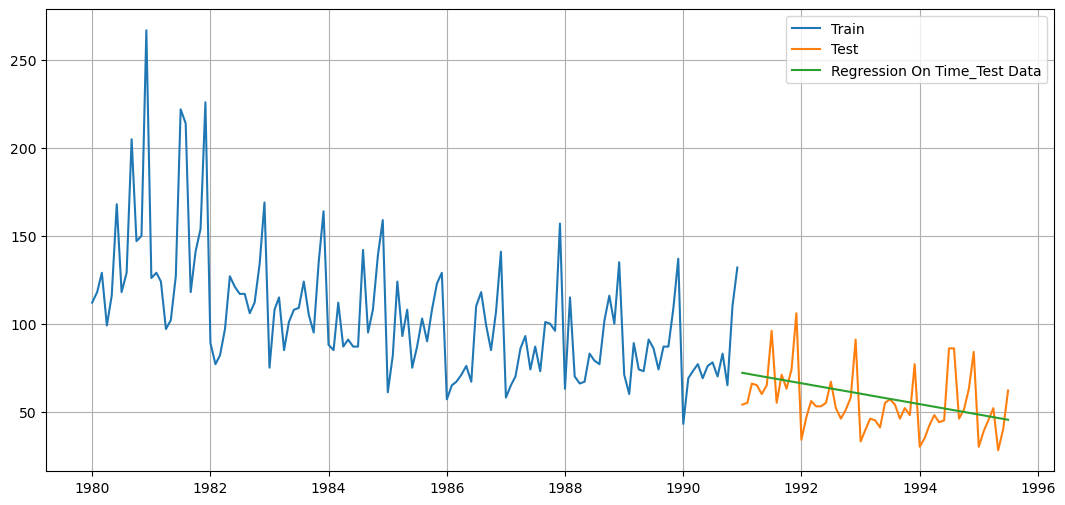

In [617]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [618]:
from sklearn import metrics

# Model Evaluation

In [619]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.63


In [620]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,16.626144


# Model 2: Naive Approach:  y^t+1=yt

In [621]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [622]:
train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [623]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

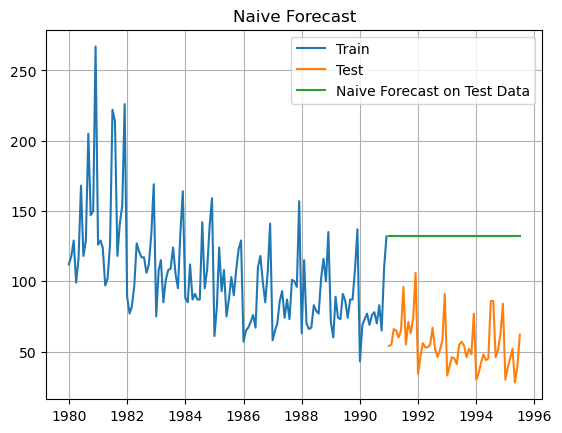

In [624]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [625]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.485


In [626]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,16.626144
NaiveModel,78.485320


# Method 3: Simple Average

In [627]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [628]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


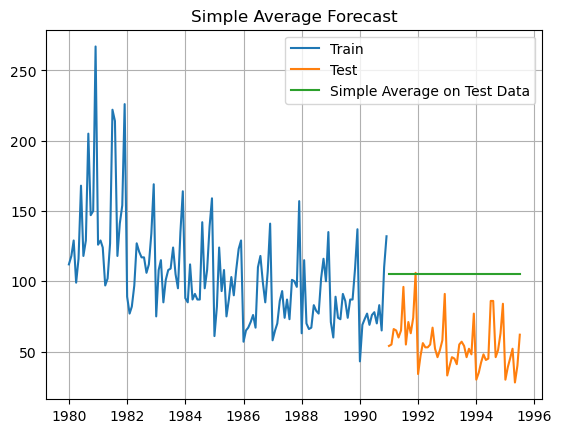

In [629]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [630]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.370


In [631]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,16.626144
NaiveModel,78.485320
SimpleAverageModel,52.369847


# Method 4: Moving Average(MA)

In [632]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [633]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


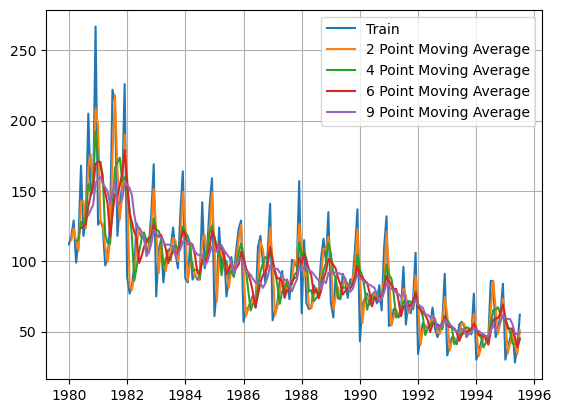

In [634]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [635]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

In [636]:
trailing_MovingAverage_test.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,54.0,93.0,90.25,85.666667,81.888889
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667


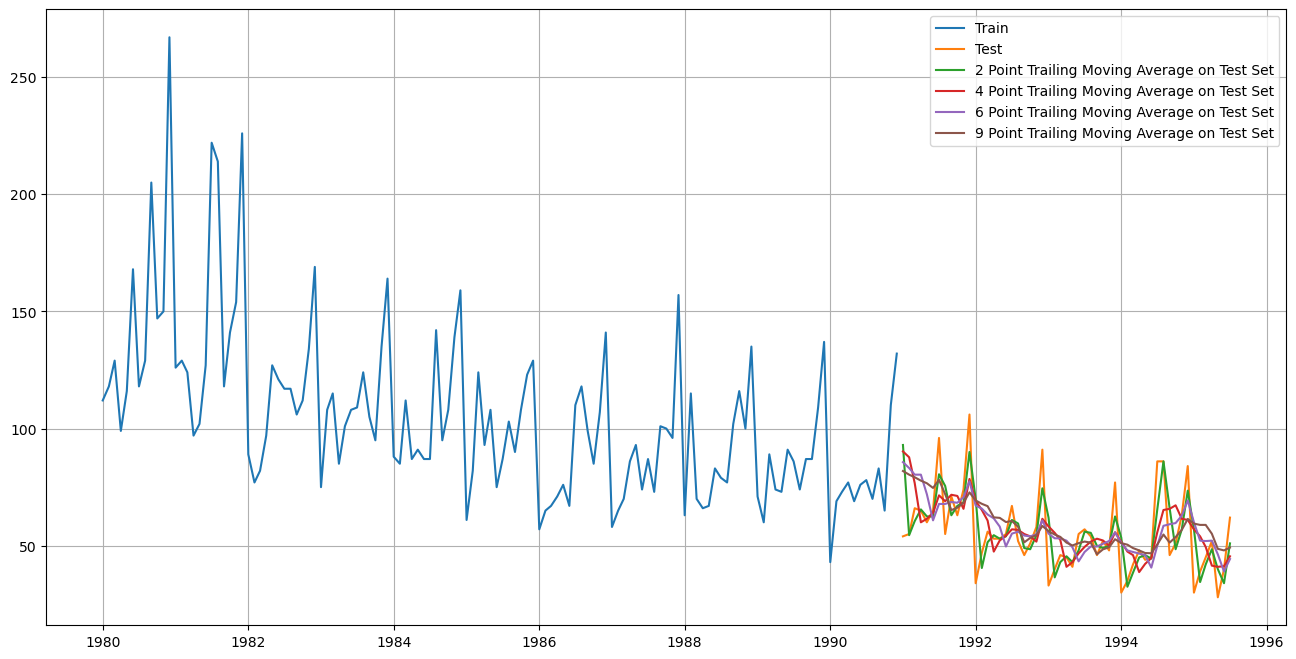

In [637]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [638]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.159
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.572
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.687
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.161


In [639]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,16.626144
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,12.158798
4pointTrailingMovingAverage,15.572375
6pointTrailingMovingAverage,15.687446
9pointTrailingMovingAverage,16.161176


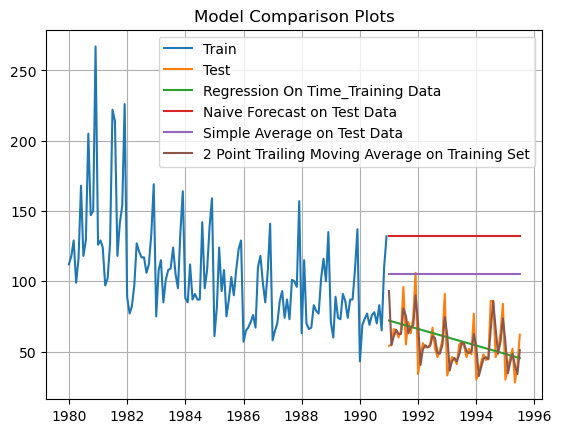

In [640]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# Method 5:Simple Exponential Smoothing

In [641]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [642]:
SES_train = train.copy()
SES_test = test.copy()

In [643]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [644]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [645]:
model_SES_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [646]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.105001
1991-02-01,55.0,87.105001
1991-03-01,66.0,87.105001
1991-04-01,65.0,87.105001
1991-05-01,60.0,87.105001


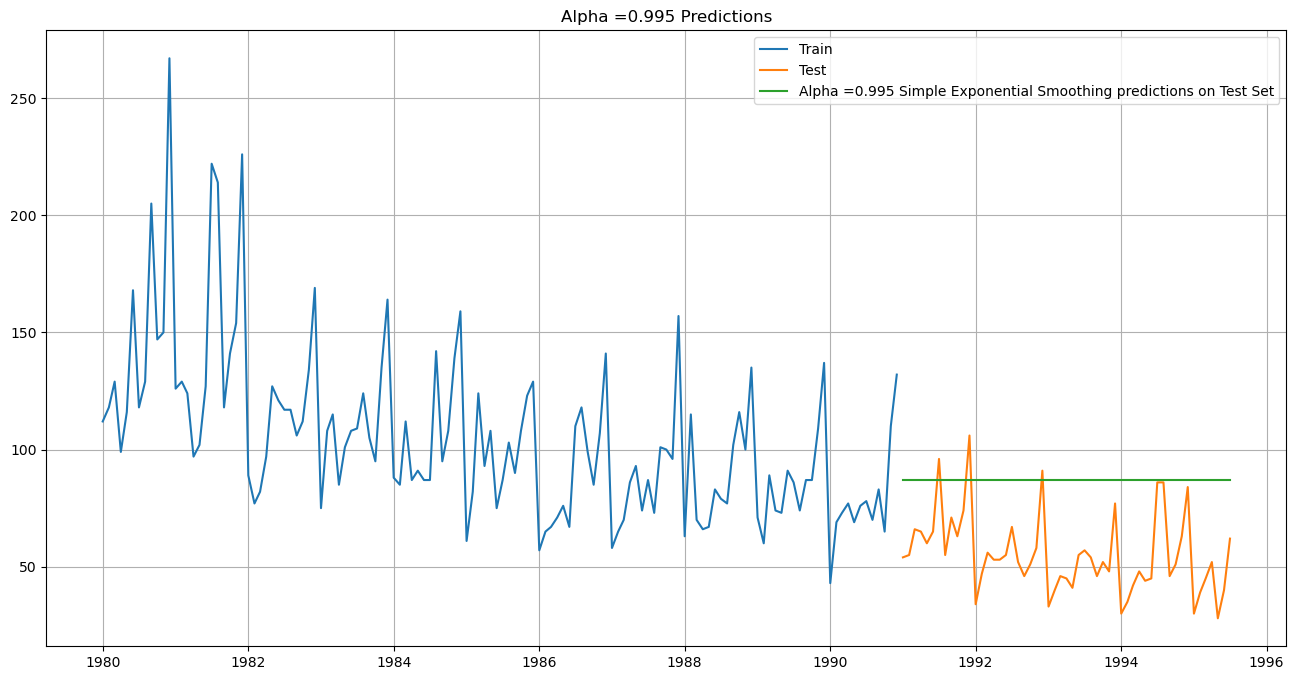

In [647]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

# Model Evaluation for α = 0.995 : Simple Exponential Smoothing

In [648]:
## Test Data
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.931


In [649]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,16.626144
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,12.158798
4pointTrailingMovingAverage,15.572375
6pointTrailingMovingAverage,15.687446
9pointTrailingMovingAverage,16.161176
"Alpha=0.995,SimpleExponentialSmoothing",35.931356


# Method 6 : Double Exponential Smoothing

In [650]:
DES_train = train.copy()
DES_test = test.copy()

In [651]:
model_DES = Holt(SES_train['Rose'])

In [652]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [653]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.129813,True
smoothing_trend,beta,0.053762,True
initial_level,l.0,145.730706,True
initial_trend,b.0,-0.100696,True


In [654]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3.head()

1991-01-01    86.161875
1991-02-01    86.247204
1991-03-01    86.332532
1991-04-01    86.417860
1991-05-01    86.503188
Freq: MS, dtype: float64

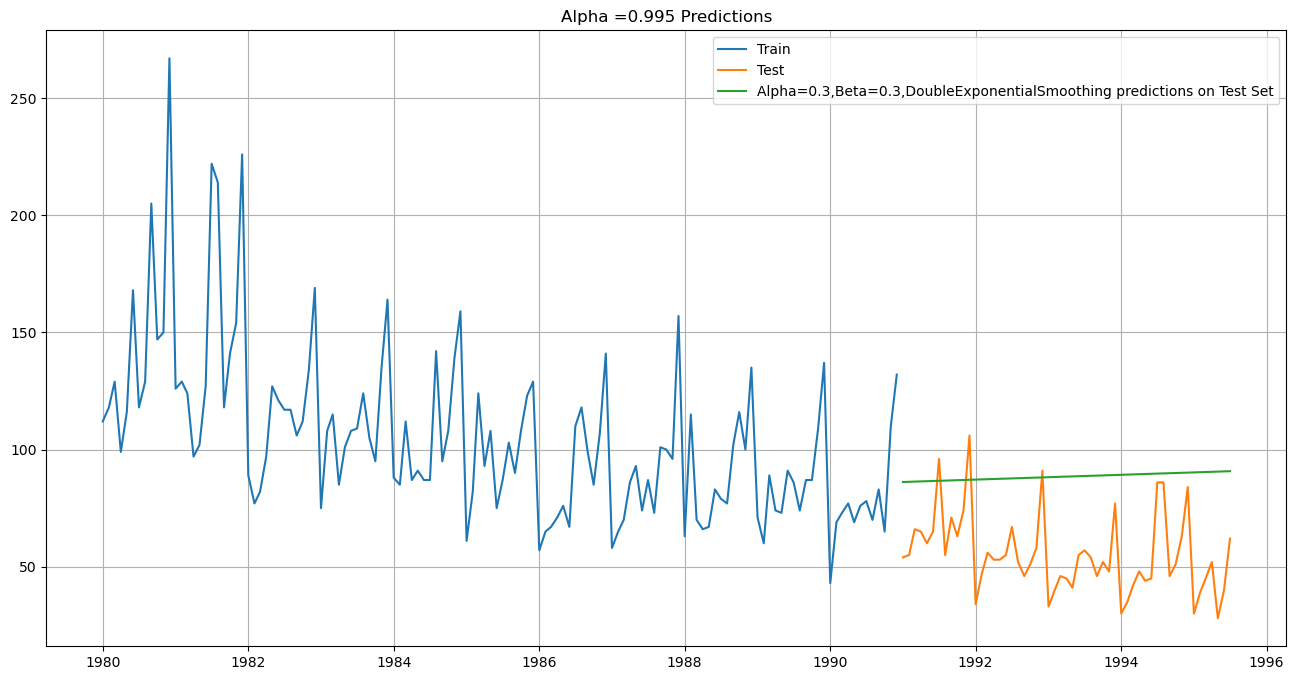

In [655]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(test_predictions_model3, label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [656]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 37.345


In [657]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
RegressionOnTime,16.626144
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,12.158798
4pointTrailingMovingAverage,15.572375
6pointTrailingMovingAverage,15.687446
9pointTrailingMovingAverage,16.161176
"Alpha=0.995,SimpleExponentialSmoothing",35.931356
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316


# Method 7:Triple Exponential Smoothing

In [658]:
TES_train = train.copy()
TES_test = test.copy()

In [659]:
model_TES = ExponentialSmoothing(SES_train['Rose'],trend='additive',seasonal='multiplicative')

In [660]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [661]:
model_TES_autofit.params

{'smoothing_level': 0.07132109562890512,
 'smoothing_trend': 0.04553831096563722,
 'smoothing_seasonal': 8.356711212063695e-07,
 'damping_trend': nan,
 'initial_level': 134.25655591779326,
 'initial_trend': -0.8038265942903572,
 'initial_seasons': array([0.83746068, 0.94985307, 1.03812083, 0.90732186, 1.02043162,
        1.11131741, 1.22228039, 1.30104211, 1.23132915, 1.20610008,
        1.40577823, 1.93832412]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [662]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4.head()

1991-01-01    56.334597
1991-02-01    63.692059
1991-03-01    69.388935
1991-04-01    60.452304
1991-05-01    67.770362
Freq: MS, dtype: float64

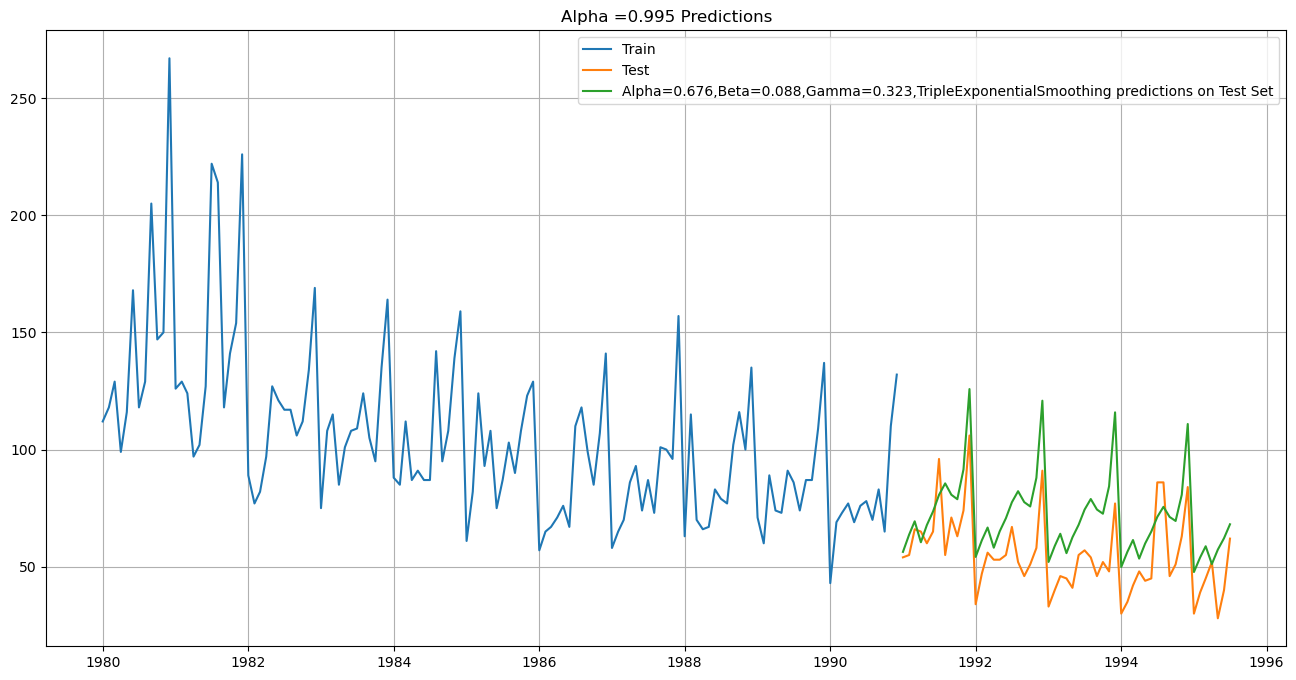

In [663]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(test_predictions_model4, label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [664]:
## Test Data - RMSE
rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 19.625


In [665]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
RegressionOnTime,16.626144
NaiveModel,78.485320
SimpleAverageModel,52.369847
2pointTrailingMovingAverage,12.158798
4pointTrailingMovingAverage,15.572375
6pointTrailingMovingAverage,15.687446
9pointTrailingMovingAverage,16.161176
"Alpha=0.995,SimpleExponentialSmoothing",35.931356
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [666]:
from statsmodels.tsa.stattools import adfuller

In [667]:
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.933
DF test p-value is 0.3167


# OR

In [668]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

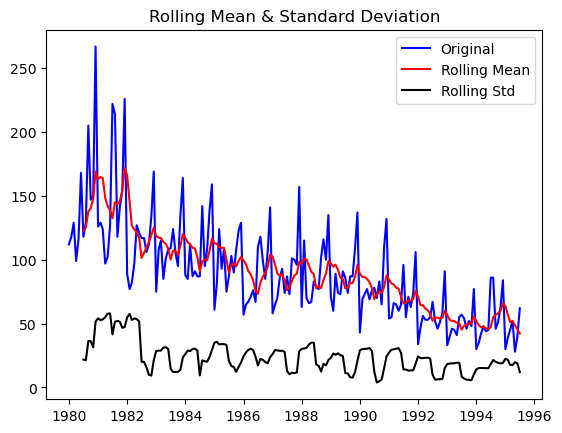

Results of Dickey-Fuller Test:
Test Statistic                  -1.933053
p-value                          0.316675
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [669]:
test_stationarity(df['Rose'])

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

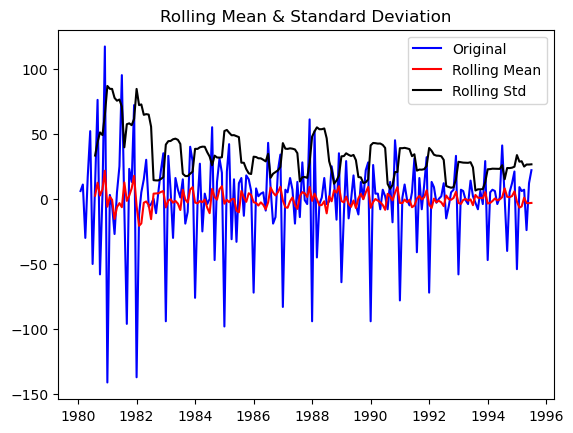

Results of Dickey-Fuller Test:
Test Statistic                -7.890753e+00
p-value                        4.443288e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [670]:
test_stationarity(df['Rose'].diff().dropna())

Let us take a difference of order 12 as a season and check whether the Time Series is stationary or not.

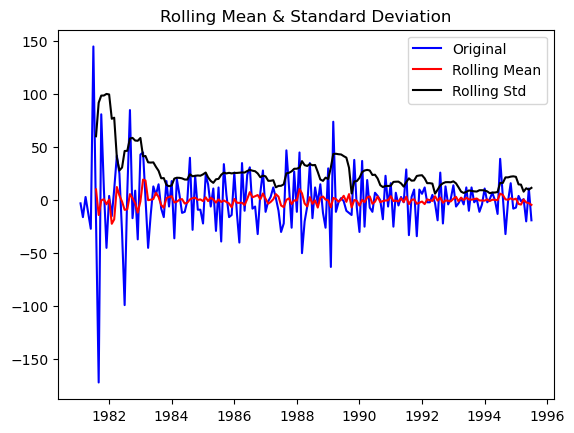

Results of Dickey-Fuller Test:
Test Statistic                  -4.456336
p-value                          0.000236
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [671]:
test_stationarity(df['Rose'].diff().diff(12).dropna())

We see that at α = 0.05 the Time Series is indeed stationary.

In [672]:
dftest = adfuller(train['Rose'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.164
DF test p-value is 0.2195


In [673]:
train_sales_log = np.log10(train['Rose'])
#Log transformation on the training data to make the time series stationary as we did with full data
train_sales_log

YearMonth
1980-01-01    2.049218
1980-02-01    2.071882
1980-03-01    2.110590
1980-04-01    1.995635
1980-05-01    2.064458
                ...   
1990-08-01    1.845098
1990-09-01    1.919078
1990-10-01    1.812913
1990-11-01    2.041393
1990-12-01    2.120574
Name: Rose, Length: 132, dtype: float64

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# Auto Regressive(AR) Models

In [674]:
# Define the p parameter to take any value between 0 and 2
p= range(1,4)

In [675]:
# Define the q parameter to take any value between 0 and 2
q = range(1, 4)

In [676]:
import itertools

 Parameter (p, d, q) estimation matrix for estimating parameters towards building AR / ARMA / ARIMA / SARIMA models             

In [677]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [678]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [679]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [680]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [681]:
seasonal_pdq
# as it seems to have 12 month seasonality as confirmned from above 

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [682]:
dftest = adfuller(train['Rose'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -2.164
DF test p-value is 0.2195


In [683]:
train_sales_ts_log = np.log10(train['Rose'])
#Log transformation on the training data to make the time series stationary as we did with full data

In [684]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

# AR Model

AR Model building to estimate best 'p' ( Lowest AIC Approach )

In [685]:
# Creating an empty Dataframe with column names only
AR_AIC = pd.DataFrame(columns=['param', 'AIC'])
AR_AIC

,param,AIC


In [686]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_ar:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    AR_AIC = AR_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 0) - AIC:-175.19623529995727
ARIMA(2, 0, 0) - AIC:-174.92260995733972
ARIMA(3, 0, 0) - AIC:-178.88928042817838


Building AR model with best 'p' parameter 

In [687]:
best_model = ARIMA(train_sales_ts_log,order = (2,0,0))#p=2 with lowest AIC 
best_results = best_model.fit()

In [688]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  91.461
Date:                Sat, 26 Aug 2023   AIC                           -174.923
Time:                        16:30:02   BIC                           -163.391
Sample:                    01-01-1980   HQIC                          -170.237
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0003      0.025     78.799      0.000       1.951       2.050
ar.L1          0.3864      0.094      4.100      0.000       0.202       0.571
ar.L2          0.1136      0.110      1.030      0.3

Calculating RMSE for best AR model 

In [689]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [690]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [691]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [692]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 48.325


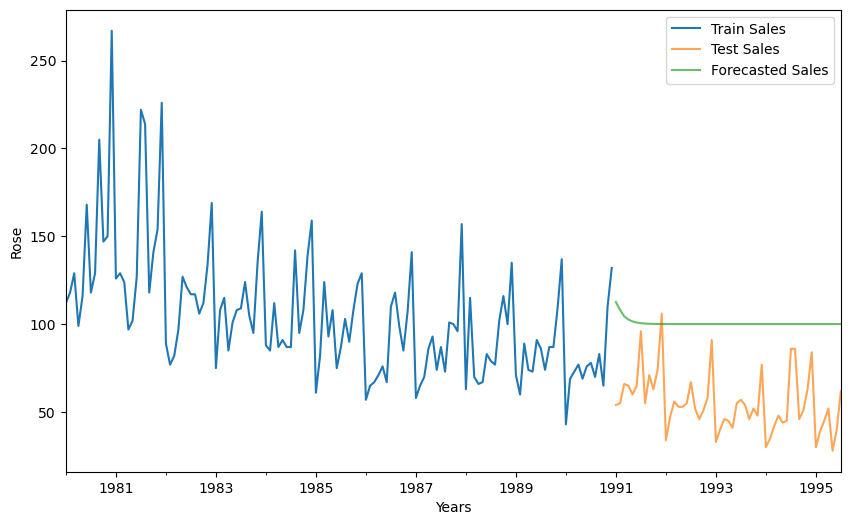

In [693]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [694]:
resultsDf_8 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best AR Model : ARIMA(2,0,0)'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,16.626144,NaN
NaiveModel,78.485320,NaN
SimpleAverageModel,52.369847,NaN
2pointTrailingMovingAverage,12.158798,NaN
4pointTrailingMovingAverage,15.572375,NaN
6pointTrailingMovingAverage,15.687446,NaN
9pointTrailingMovingAverage,16.161176,NaN
"Alpha=0.995,SimpleExponentialSmoothing",35.931356,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339,NaN


# ARMA Model

ARMA Model building to estimate best 'p' , 'q' ( Lowest AIC Approach )

In [695]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [696]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq_arma:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARMA_AIC =ARMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-182.64430155080396
ARIMA(1, 0, 2) - AIC:-185.36591681353912
ARIMA(1, 0, 3) - AIC:-183.91732065356433
ARIMA(2, 0, 1) - AIC:-184.6840060725208
ARIMA(2, 0, 2) - AIC:-184.73080164530273
ARIMA(2, 0, 3) - AIC:-182.8477487412245
ARIMA(3, 0, 1) - AIC:-183.36501767228543
ARIMA(3, 0, 2) - AIC:-182.86395706485797
ARIMA(3, 0, 3) - AIC:-180.7621311964113


In [697]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
1,"(1, 0, 2)",-185.365917
4,"(2, 0, 2)",-184.730802
3,"(2, 0, 1)",-184.684006
2,"(1, 0, 3)",-183.917321
6,"(3, 0, 1)",-183.365018


Building ARMA model with best p,q parameter 

In [698]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

In [699]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  98.381
Date:                Sat, 26 Aug 2023   AIC                           -180.762
Time:                        16:30:04   BIC                           -157.700
Sample:                    01-01-1980   HQIC                          -171.391
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0114      0.105     19.178      0.000       1.806       2.217
ar.L1         -0.1875      4.104     -0.046      0.964      -8.232       7.857
ar.L2          0.7940      1.973      0.402      0.6

Calculating RMSE for best ARIMA model

In [700]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [701]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [702]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [703]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 38.171


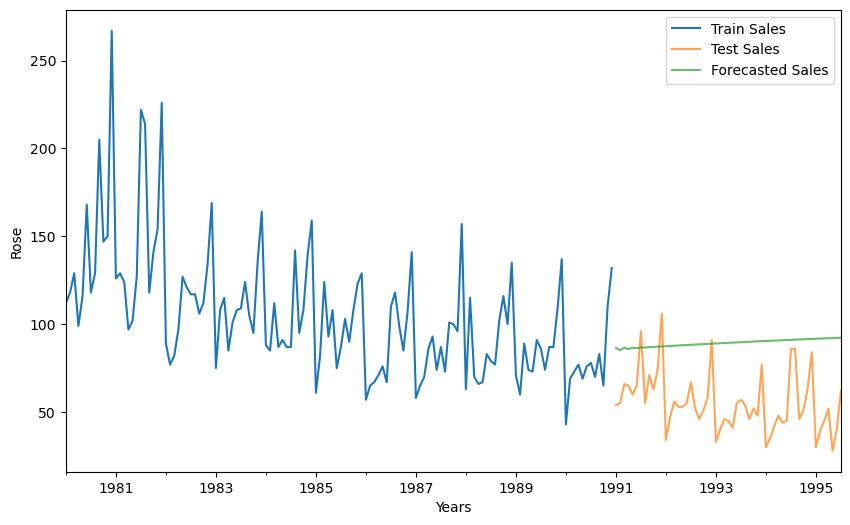

In [704]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [705]:
resultsDf_9 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARMA Model : ARIMA(3,0,3)'])


resultsDf=pd.concat([resultsDf,resultsDf_9])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,16.626144,NaN
NaiveModel,78.485320,NaN
SimpleAverageModel,52.369847,NaN
2pointTrailingMovingAverage,12.158798,NaN
4pointTrailingMovingAverage,15.572375,NaN
6pointTrailingMovingAverage,15.687446,NaN
9pointTrailingMovingAverage,16.161176,NaN
"Alpha=0.995,SimpleExponentialSmoothing",35.931356,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339,NaN


# ARIMA Model building to estimate best 'p' , 'd' , 'q' paramters ( Lowest AIC Approach )

In [706]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [707]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-182.64430155080396
ARIMA(1, 0, 2) - AIC:-185.36591681353912
ARIMA(1, 0, 3) - AIC:-183.91732065356433
ARIMA(1, 1, 1) - AIC:-186.10111854360156
ARIMA(1, 1, 2) - AIC:-186.19506523813635
ARIMA(1, 1, 3) - AIC:-184.30629931183793
ARIMA(2, 0, 1) - AIC:-184.6840060725208
ARIMA(2, 0, 2) - AIC:-184.73080164530273
ARIMA(2, 0, 3) - AIC:-182.8477487412245
ARIMA(2, 1, 1) - AIC:-184.82917469580758
ARIMA(2, 1, 2) - AIC:-184.32051123093294
ARIMA(2, 1, 3) - AIC:-182.34311128666928
ARIMA(3, 0, 1) - AIC:-183.36501767228543
ARIMA(3, 0, 2) - AIC:-182.86395706485797
ARIMA(3, 0, 3) - AIC:-180.7621311964113
ARIMA(3, 1, 1) - AIC:-183.3291858245205
ARIMA(3, 1, 2) - AIC:-182.38811974307396
ARIMA(3, 1, 3) - AIC:-183.06117170507787


In [708]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
4,"(1, 1, 2)",-186.195065
3,"(1, 1, 1)",-186.101119
1,"(1, 0, 2)",-185.365917
9,"(2, 1, 1)",-184.829175
7,"(2, 0, 2)",-184.730802


Building ARIMA model with best parameters p,d,q

In [709]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

In [710]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  98.381
Date:                Sat, 26 Aug 2023   AIC                           -180.762
Time:                        16:30:07   BIC                           -157.700
Sample:                    01-01-1980   HQIC                          -171.391
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0114      0.105     19.178      0.000       1.806       2.217
ar.L1         -0.1875      4.104     -0.046      0.964      -8.232       7.857
ar.L2          0.7940      1.973      0.402      0.6

Calculating RMSE for best ARIMA model 

In [711]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [712]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [713]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [714]:
# Compute the root mean square error
mse = ((testCopy1['Rose'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 38.171


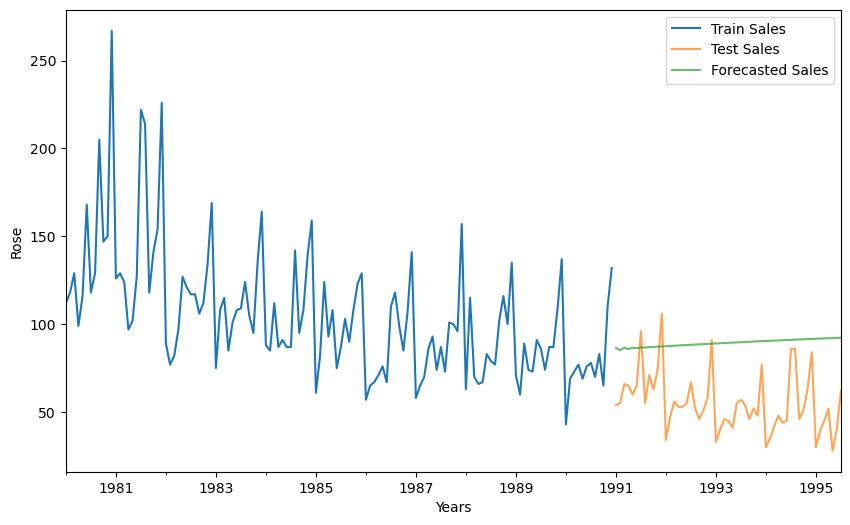

In [715]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [716]:
resultsDf_10 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf=pd.concat([resultsDf,resultsDf_10])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,16.626144,NaN
NaiveModel,78.485320,NaN
SimpleAverageModel,52.369847,NaN
2pointTrailingMovingAverage,12.158798,NaN
4pointTrailingMovingAverage,15.572375,NaN
6pointTrailingMovingAverage,15.687446,NaN
9pointTrailingMovingAverage,16.161176,NaN
"Alpha=0.995,SimpleExponentialSmoothing",35.931356,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339,NaN


# SARIMA Model

Finding Seasonality = 12 from ACF/PACF plots

In [717]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

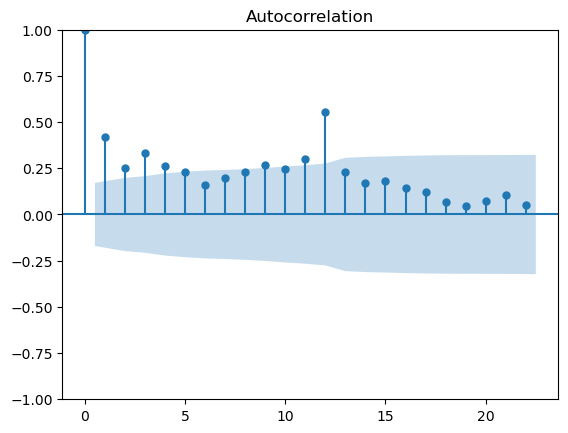

In [718]:
plot_acf(train['Rose'],alpha=0.05);

SARIMA Model building to estimate best parameters 

In [719]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [720]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [721]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:-255.48206137280476
SARIMA(1, 0, 1)x(1, 0, 2, 12) - AIC:-231.13456949752532
SARIMA(1, 0, 1)x(1, 0, 3, 12) - AIC:294.6494861544961
SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:-232.74482345201264
SARIMA(1, 0, 1)x(1, 1, 2, 12) - AIC:-217.13829816450942
SARIMA(1, 0, 1)x(1, 1, 3, 12) - AIC:4942.979021328488
SARIMA(1, 0, 1)x(2, 0, 1, 12) - AIC:-236.66361915489392
SARIMA(1, 0, 1)x(2, 0, 2, 12) - AIC:-240.51571309262778
SARIMA(1, 0, 1)x(2, 0, 3, 12) - AIC:-220.51329395198746
SARIMA(1, 0, 1)x(2, 1, 1, 12) - AIC:-213.6316845681553
SARIMA(1, 0, 1)x(2, 1, 2, 12) - AIC:-216.1733451227012
SARIMA(1, 0, 1)x(2, 1, 3, 12) - AIC:3764.208532585704
SARIMA(1, 0, 1)x(3, 0, 1, 12) - AIC:-217.8282438530649
SARIMA(1, 0, 1)x(3, 0, 2, 12) - AIC:-220.46877856065632
SARIMA(1, 0, 1)x(3, 0, 3, 12) - AIC:-220.44610324362432
SARIMA(1, 0, 1)x(3, 1, 1, 12) - AIC:-185.24675723113842
SARIMA(1, 0, 1)x(3, 1, 2, 12) - AIC:-172.7023033041844
SARIMA(1, 0, 1)x(3, 1, 3, 12) - AIC:3802.507483599788
SARI

SARIMA(2, 0, 3)x(1, 1, 3, 12) - AIC:4817.271939462773
SARIMA(2, 0, 3)x(2, 0, 1, 12) - AIC:-232.95655804359117
SARIMA(2, 0, 3)x(2, 0, 2, 12) - AIC:-232.82249334731324
SARIMA(2, 0, 3)x(2, 0, 3, 12) - AIC:-204.31712855693956
SARIMA(2, 0, 3)x(2, 1, 1, 12) - AIC:-209.38178946519966
SARIMA(2, 0, 3)x(2, 1, 2, 12) - AIC:-207.8970358308239
SARIMA(2, 0, 3)x(2, 1, 3, 12) - AIC:3686.2506061620325
SARIMA(2, 0, 3)x(3, 0, 1, 12) - AIC:-208.73827366281523
SARIMA(2, 0, 3)x(3, 0, 2, 12) - AIC:-209.5462065794739
SARIMA(2, 0, 3)x(3, 0, 3, 12) - AIC:-210.58210604429442
SARIMA(2, 0, 3)x(3, 1, 1, 12) - AIC:-177.63885377724452
SARIMA(2, 0, 3)x(3, 1, 2, 12) - AIC:-163.8907373725705
SARIMA(2, 0, 3)x(3, 1, 3, 12) - AIC:3689.9506293315562
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:-246.47193881191077
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:-225.25689696359734
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:4192.976578939408
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:-224.91674527580983
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:-210.99970125785177
S

SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:-204.74030480900743
SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3577.652896411736
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:-201.68278054357907
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:-202.9140507511198
SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:1062.5259807797238
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:-171.43007411546347
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:-169.31729629632392
SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:3677.730076286025
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:-237.75861865334863
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:-221.6371107518375
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3931.1956197192226
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:-222.51608737588174
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:-201.65942122099736
SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:3688.671748487074
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:-226.8136681694496
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:-230.03498611370787
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3908.9652309632497
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:-208.26404075114905
SARI

In [722]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
0,"(1, 0, 1)","(1, 0, 1, 12)",-255.482061
108,"(2, 0, 1)","(1, 0, 1, 12)",-251.457062
126,"(2, 0, 2)","(1, 0, 1, 12)",-250.373953
18,"(1, 0, 2)","(1, 0, 1, 12)",-248.708218
234,"(3, 0, 2)","(1, 0, 1, 12)",-248.377261


Building SARIMA model with the best parameters 

In [723]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [724]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 137.704
Date:                            Sat, 26 Aug 2023   AIC                           -265.407
Time:                                    16:38:53   BIC                           -250.993
Sample:                                01-01-1980   HQIC                          -259.550
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.002    608.869      0.000       0.996       1.003
ma.L1         -0.9122      0.045   

In [725]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)

In [726]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)

In [727]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [728]:
testCopy

,Rose,sales_ts_forecasted
YearMonth,,
1991-01-01,54.0,54.019430
1991-02-01,55.0,64.415871
1991-03-01,66.0,69.325530
1991-04-01,65.0,64.510314
1991-05-01,60.0,67.710653
1991-06-01,65.0,70.179780
1991-07-01,96.0,75.314163
1991-08-01,55.0,75.872147
1991-09-01,71.0,78.415885


In [729]:
# Compute the root mean square error
mse = ((testCopy['Rose'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 17.045


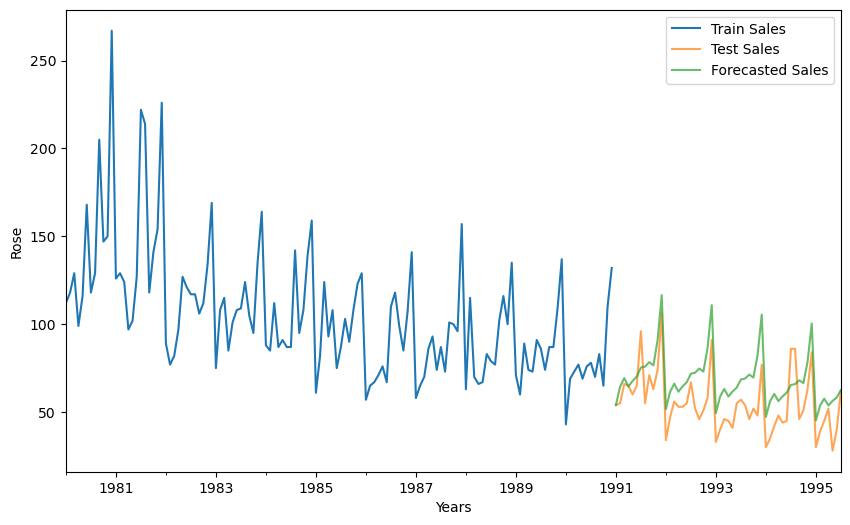

In [730]:
axis = train['Rose'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [731]:
resultsDf_11 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best SARIMA Model : SARIMAX(1, 0, 1)x(1, 0, 1, 12)'])

resultsDf=pd.concat([resultsDf,resultsDf_11])
resultsDf

,Test RMSE,RMSE
RegressionOnTime,16.626144,NaN
NaiveModel,78.485320,NaN
SimpleAverageModel,52.369847,NaN
2pointTrailingMovingAverage,12.158798,NaN
4pointTrailingMovingAverage,15.572375,NaN
6pointTrailingMovingAverage,15.687446,NaN
9pointTrailingMovingAverage,16.161176,NaN
"Alpha=0.995,SimpleExponentialSmoothing",35.931356,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339,NaN


# 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [732]:
resultsDf

,Test RMSE,RMSE
RegressionOnTime,16.626144,NaN
NaiveModel,78.485320,NaN
SimpleAverageModel,52.369847,NaN
2pointTrailingMovingAverage,12.158798,NaN
4pointTrailingMovingAverage,15.572375,NaN
6pointTrailingMovingAverage,15.687446,NaN
9pointTrailingMovingAverage,16.161176,NaN
"Alpha=0.995,SimpleExponentialSmoothing",35.931356,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339,NaN


# 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands

Building the most optimum model on the Full Data.

In [733]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -737.093
Date:                           Sat, 26 Aug 2023   AIC                           1488.186
Time:                                   16:38:53   BIC                           1510.178
Sample:                               01-01-1980   HQIC                          1497.109
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7061      0.075     -9.447      0.000      -0.853      -0.560
ma.L2         -0.2184      0.069     -3.157

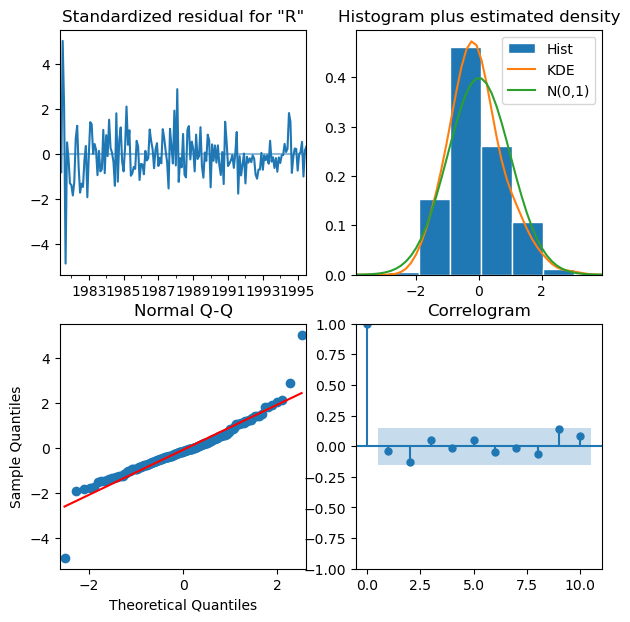

In [743]:
results_full_data_model.plot_diagnostics(figsize=(7,7));

# Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [735]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [736]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,56.751677,17.238395,22.965044,90.538310
1995-09-01,50.921097,17.960638,15.718893,86.123301
1995-10-01,54.151815,18.007804,18.857168,89.446461
1995-11-01,55.419198,18.054846,20.032350,90.806045
1995-12-01,74.151037,18.101766,38.672228,109.629846
1996-01-01,39.363294,18.148564,3.792762,74.933826
1996-02-01,40.808647,18.393109,4.758815,76.858479
1996-03-01,42.651051,18.476347,6.438075,78.864026
1996-04-01,42.212170,18.531652,5.890800,78.533540
1996-05-01,39.857583,18.586792,3.428140,76.287026


In [737]:
from sklearn.metrics import  mean_squared_error

In [738]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.241827874213744


In [739]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

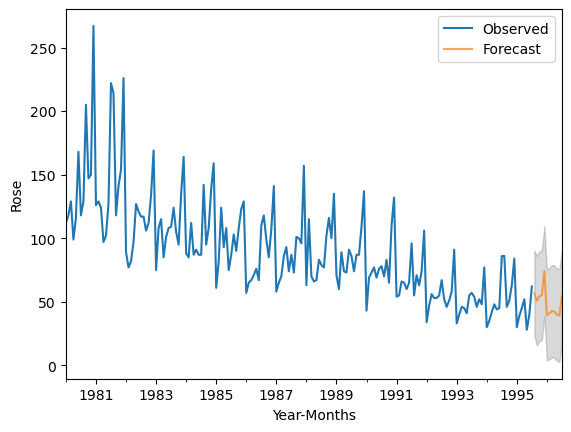

In [740]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [741]:
resultsDf

,Test RMSE,RMSE
RegressionOnTime,16.626144,NaN
NaiveModel,78.485320,NaN
SimpleAverageModel,52.369847,NaN
2pointTrailingMovingAverage,12.158798,NaN
4pointTrailingMovingAverage,15.572375,NaN
6pointTrailingMovingAverage,15.687446,NaN
9pointTrailingMovingAverage,16.161176,NaN
"Alpha=0.995,SimpleExponentialSmoothing",35.931356,NaN
"Alpha=0.995,Beta=0.995:DoubleExponentialSmoothing",37.345316,NaN
"Alpha=0.99,Beta=0.0001,Gamma=0.005:DoubleExponentialSmoothing",19.625339,NaN
